# Graduate Admission
Graduate Admission data is obtained from https://www.kaggle.com/mohansacharya/graduate-admissions.  

**Context**: This dataset is created for prediction of Graduate Admissions from an Indian perspective.  
**Content**: The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are:
1. GRE Scores (out of 340) 
2. TOEFL Scores (out of 120) 
3. University Rating (out of 5) 
4. Statement of Purpose and Letter of Recommendation Strength (out of 5) 
5. Undergraduate GPA (out of 10) 
6. Research Experience (either 0 or 1) 
7. Chance of Admit (ranging from 0 to 1)  

**Acknowledgements**: This dataset is inspired by the UCLA Graduate Dataset. The test scores and GPA are in the older format. The dataset is owned by Mohan S Acharya.  
**Inspiration**: This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.  
**Citation**: Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

## Data Preprocessing
Load libraries  
Load csv file to dataframe

In [23]:
import numpy as np
import pandas as pd
df = pd.read_csv('Admission_Predict_Ver1.1.csv', index_col=0)

Convert quantitative data ('Chance of Admit') into categorical ('Chance'). The reason is because we want to implement classification methods learnt in class.

In [24]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
names = ['very low', 'moderately low', 'medium', 'moderately high', 'very high']
df['Chance'] = pd.cut(df['Chance of Admit '], bins, labels=names)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Chance
Serial No.,,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92,very high
2,324,107,4,4.0,4.5,8.87,1,0.76,moderately high
3,316,104,3,3.0,3.5,8.00,1,0.72,moderately high
4,322,110,3,3.5,2.5,8.67,1,0.80,moderately high
5,314,103,2,2.0,3.0,8.21,0,0.65,moderately high


In [25]:
df = df.drop(columns=['Chance of Admit ']) # drop qualitative column (Chance of Admit)

## EDA
Pandas Profiling  
To install pandas_profiling, use 'pip install pandas-profiling' or 'conda install -c anaconda pandas-profiling'

In [32]:
import pandas as pd
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile

## Decision Tree
Load library and split data into train/test sets

In [18]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Chance'])
y = df[["Chance"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Hyperparameter (max_depth) tuning

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
train_error = []
mean_cv_error = []
max_depth = []
for i in range(1,21,1):
    model = DecisionTreeClassifier(max_depth = i)
    cv_score = cross_validate(model, X_train, y_train, cv=5, return_train_score=True)
    train_error.append(1-model.fit(X_train, y_train).score(X_train, y_train))
    mean_cv_error.append(1-cv_score['test_score'].mean())
    max_depth.append(i)

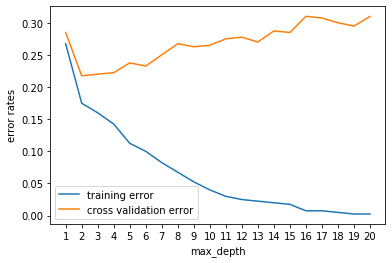

In [21]:
import matplotlib.pyplot as plt
plt.plot(max_depth, train_error, label = 'training error')
plt.plot(max_depth, mean_cv_error, label = 'cross validation error')
plt.legend()
plt.ylabel('error rates')
plt.xlabel('max_depth')
plt.xticks(range(1,21,1))
plt.show()

From the plot, we can see that the higher the max_depth, the lower the training error. However, the validation error is lowest when max_depth equals 2, and then increases again with higher max_depth. Therefore, we choose max_depth = 2

In [29]:
tree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
print(f'The test error is: {1-tree_model.score(X_test, y_test): .3f}')

The test error is:  0.180
